<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
sns.set_style("whitegrid")
#sns.set_context("poster")


In [132]:
df = pd.read_csv('data/search.csv', encoding='utf8')
df.head() 

,First Search Time (GMT),Country ID,All Department (APS) or Category,Site Variant,Device Type,Device Model,"Search Type (Keyword,Visual,Browse)",Session ID,Query ID,Prime Customer (Y/N),...,Items Consumed (Subscription),Shopping Refinement Pickers,Paid Purchase (Y/N),Item Borrowed (Y/N),Items Borrowed,Next Query Group via Click,Query Abandoned (Y/N),Query Reformulated (Y/N),Amazon Fresh (Y/N),Store Visited
0,2017-01-04 22:12:00,4,toys,PC Browser,Desktop,301612268.0,kw,276-9733532-9164864,1483567919,0,...,0,NaN,0,NaN,NaN,1.0,0,0,NaN,DE
1,2018-01-07 20:21:26,4,aps,PC Browser,Desktop,329022669.0,kw,276-9733532-9164864,1515356485,0,...,0,NaN,0,0.0,0.0,1.0,0,0,NaN,DE
2,2016-03-08 21:50:46,4,aps,NaN,Tablet,NaN,br,278-2045708-6116451,1457473846,0,...,0,NaN,0,NaN,NaN,1.0,0,1,NaN,DE
3,2018-01-07 20:35:20,4,aps,PC Browser,Desktop,329022669.0,kw,276-9733532-9164864,1515357319,0,...,0,NaN,0,0.0,0.0,1.0,0,0,NaN,DE
4,2018-04-12 08:07:31,4,aps,Mobile Browser,Smartphone,515640020.0,kw,280-2749959-8405368,1523520450,0,...,0,NaN,0,0.0,0.0,NaN,1,0,0.0,DE


In [133]:
df.describe()

,Country ID,Device Model,Query ID,Prime Customer (Y/N),Is From External Link (Y/N),Search From External Site (Y/N),Amazon Business Customer (Y/N),Amazon Fresh Customer (Y/N),Music Subscriber (Y/N),First Browse Node,...,Number of Shopping Refinements,Highest Number of Shopping Refinements,Items Consumed (Subscription),Paid Purchase (Y/N),Item Borrowed (Y/N),Items Borrowed,Next Query Group via Click,Query Abandoned (Y/N),Query Reformulated (Y/N),Amazon Fresh (Y/N)
count,425.0,3.420000e+02,4.250000e+02,425.000000,425.000000,425.000000,421.0,349.0,349.0,4.250000e+02,...,425.000000,425.000000,425.000000,425.000000,217.0,217.0,266.000000,425.000000,425.000000,90.0
mean,4.0,3.847522e+08,1.500212e+09,0.072941,0.025882,0.105882,0.0,0.0,0.0,7.265344e+08,...,0.230588,0.228235,0.047059,0.047059,0.0,0.0,0.646617,0.209412,0.225882,0.0
std,0.0,1.358886e+08,2.352107e+07,0.260346,0.158971,0.308050,0.0,0.0,0.0,1.948185e+09,...,0.609288,0.592527,0.333148,0.212014,0.0,0.0,0.478922,0.407368,0.418655,0.0
min,4.0,1.965754e+07,1.456179e+09,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
25%,4.0,3.247018e+08,1.483565e+09,0.000000,0.000000,0.000000,0.0,0.0,0.0,3.011280e+05,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
50%,4.0,3.385438e+08,1.497562e+09,0.000000,0.000000,0.000000,0.0,0.0,0.0,3.011280e+05,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.0
75%,4.0,4.320761e+08,1.513115e+09,0.000000,0.000000,0.000000,0.0,0.0,0.0,3.408430e+08,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.0
max,4.0,1.021740e+09,1.547190e+09,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.611853e+10,...,6.000000,6.000000,4.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0


In [134]:
#df.info()

In [135]:
subset = df[['First Search Time (GMT)','All Department (APS) or Category', 'Keywords', 'Is From External Link (Y/N)','Search From External Site (Y/N)','Paid Purchase (Y/N)','Number of Clicked Items', 'Number of Items Added to Cart', 'Number of Items Ordered']]
subset.columns = ['time','category','keyword','ext_link','ext_search','purchase','clicks', 'card_added','card_ordered']
subset.describe().round()

,ext_link,ext_search,purchase,clicks,card_added,card_ordered
count,425.0,425.0,425.0,425.0,425.0,425.0
mean,0.0,0.0,0.0,2.0,0.0,0.0
std,0.0,0.0,0.0,2.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,1.0,0.0,0.0
75%,0.0,0.0,0.0,2.0,0.0,0.0
max,1.0,1.0,1.0,18.0,2.0,2.0


In [136]:
print (type(subset.time[0]))
subset.loc[:,'time'] = pd.to_datetime(subset.time)
print (type(subset.time[0]))
print (subset.time[0:3,])

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
0   2017-01-04 22:12:00
1   2018-01-07 20:21:26
2   2016-03-08 21:50:46
Name: time, dtype: datetime64[ns]


In [243]:
#col=['year','month','day']
subset.loc[:,'year'] = subset['time'].dt.year.values.astype(int)
subset.loc[:,'month'] = subset['time'].dt.month.values.astype(int)
subset.loc[:,'day'] = subset['time'].dt.day.values.astype(int)
subset.loc[:,'hour'] = subset['time'].dt.hour.values.astype(int)
subset.loc[:,'day_name'] = subset['time'].dt.day_name() 

subset.head(3)


,time,category,keyword,ext_link,ext_search,purchase,clicks,card_added,card_ordered,year,month,day,hour,day_name
0,2017-01-04 22:12:00,toys,baby born,0,0,0,3,0,0,2017,1,4,22,Wednesday
1,2018-01-07 20:21:26,aps,haba bausteine,0,0,0,5,0,0,2018,1,7,20,Sunday
2,2016-03-08 21:50:46,aps,NaN,0,0,0,0,0,0,2016,3,8,21,Tuesday


In [131]:
print(subset.time.min())
print(subset.time.max())

2016-02-22 22:05:19
2019-01-11 07:02:55


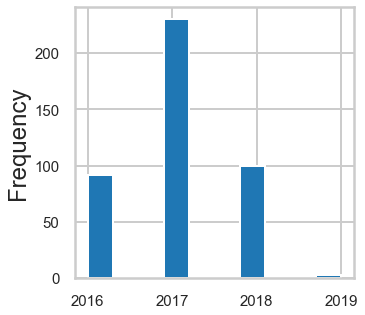

In [269]:
subset.year.plot(kind='hist',fontsize = 15, figsize=(5,5));

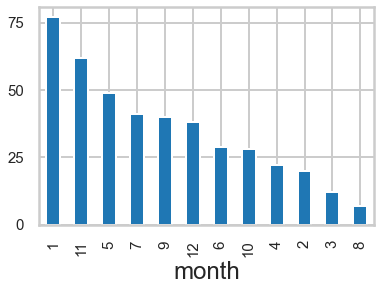

In [271]:
month_hist = subset.groupby('month').size()
month_hist = month_hist.sort_values(ascending=False)
month_hist.plot.bar(fontsize = 15)

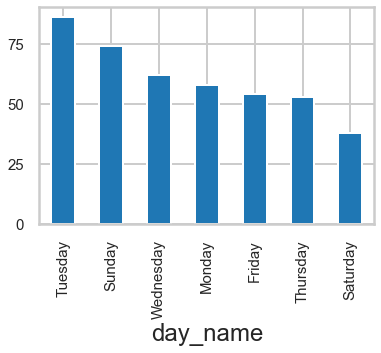

In [264]:
day_hist = subset.groupby('day_name').size()
day_hist = day_hist.sort_values(ascending=False)
day_hist.plot.bar(fontsize = 15)

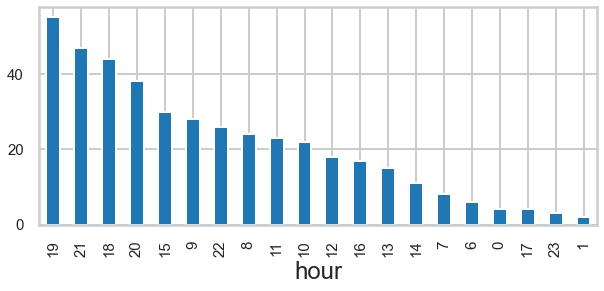

In [276]:
hour_hist = subset.groupby('hour').size()
hour_hist = hour_hist.sort_values(ascending=False)
hour_hist.plot.bar(fontsize = 15, figsize=(10,4))

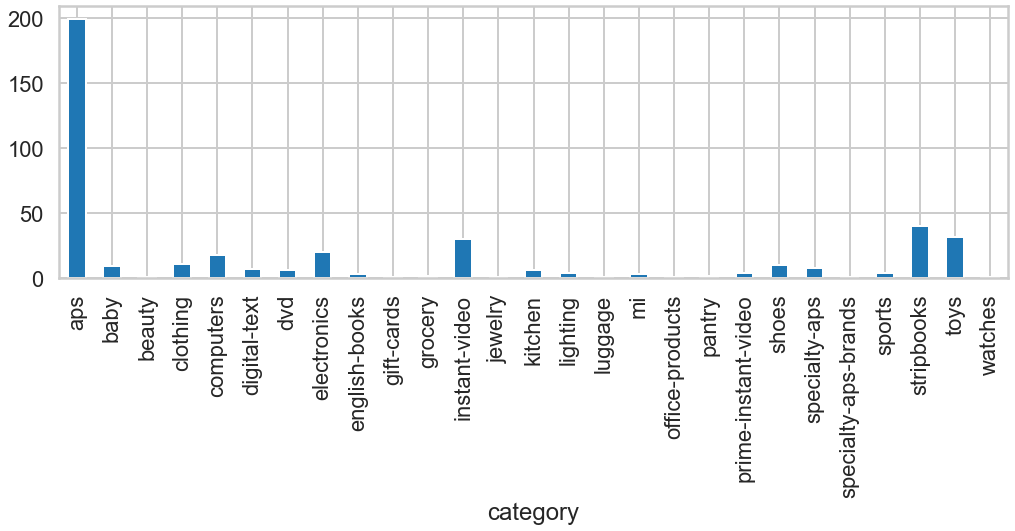

In [283]:
category=subset.groupby(['category']).size()
category.plot(kind='bar',figsize=(17,5));
#categories are bascically user choices from the search dopdown on amazon.com 
#aps stands for 'look in all categories'

In [284]:
subset_clicked = subset[(subset['clicks']>1)]
print (len(subset_clicked))
subset_clicked.mean()

141


ext_link           0.035461
ext_search         0.092199
purchase           0.106383
clicks             4.000000
card_added         0.184397
card_ordered       0.120567
year            2017.092199
month              6.553191
day               16.787234
hour              16.007092
dtype: float64

In [285]:
subset_clicked = subset_clicked.sort_values('card_ordered', ascending=False)
subset_clicked.reset_index(drop=True, inplace=True)
subset_clicked

,time,category,keyword,ext_link,ext_search,purchase,clicks,card_added,card_ordered,year,month,day,hour,day_name
0,2016-04-20 12:07:28,electronics,NaN,1,0,1,9,2,2,2016,4,20,12,Wednesday
1,2017-05-09 15:48:09,clothing,jacke herren,0,0,1,7,2,2,2017,5,9,15,Tuesday
2,2018-06-24 13:21:28,aps,smartphone halter fahrrad,0,1,1,3,1,1,2018,6,24,13,Sunday
3,2018-07-21 11:45:30,instant-video,eiskönigin,0,1,1,3,0,1,2018,7,21,11,Saturday
4,2017-02-26 09:08:44,aps,stilltshirt,0,0,1,3,1,1,2017,2,26,9,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,2017-01-04 21:14:55,toys,playmobil babyzimmer,0,0,0,4,0,0,2017,1,4,21,Wednesday
137,2016-10-22 16:25:28,instant-video,iceage 2,0,0,0,2,0,0,2016,10,22,16,Saturday
138,2018-05-13 19:25:24,aps,paris besatzung,0,1,0,5,0,0,2018,5,13,19,Sunday
139,2018-06-24 13:58:25,electronics,bluetooth kopfhörer rapoo,0,0,0,2,0,0,2018,6,24,13,Sunday


In [286]:
cols = ['category','keyword','purchase','clicks','card_added','card_ordered']
print(subset_clicked.loc[:,cols].head(30))


         category                                      keyword  purchase  \
0     electronics                                          NaN         1   
1        clothing                                 jacke herren         1   
2             aps                    smartphone halter fahrrad         1   
3   instant-video                                   eiskönigin         1   
4             aps                                  stilltshirt         1   
5           shoes                                     bisgaard         1   
6             aps                     tip-toi bücher dschungel         1   
7         kitchen                             washi tape glitz         1   
8             aps                           ipad pro 9.7 hülle         1   
9             aps                                baterrien aaa         1   
10        grocery                                         voss         1   
11            aps                                samsung watch         1   
12          

In [287]:
clicks=subset_clicked.groupby(['category']).sum()

clicks = clicks.loc[:,['clicks','card_added','card_ordered']].sort_values('clicks', ascending=False)
clicks.reset_index(inplace=True)
clicks = clicks.loc[1:,:]
clicks [0:40]

,category,clicks,card_added,card_ordered
1,toys,53,0,0
2,computers,40,0,0
3,instant-video,37,3,1
4,clothing,28,4,2
5,stripbooks,27,0,0
6,electronics,25,2,2
7,shoes,14,1,1
8,digital-text,10,0,0
9,specialty-aps,7,0,0
10,kitchen,7,2,1


[Text(0, 0, 'toys'),
 Text(0, 0, 'computers'),
 Text(0, 0, 'instant-video'),
 Text(0, 0, 'clothing'),
 Text(0, 0, 'stripbooks'),
 Text(0, 0, 'electronics'),
 Text(0, 0, 'shoes'),
 Text(0, 0, 'digital-text'),
 Text(0, 0, 'specialty-aps'),
 Text(0, 0, 'kitchen'),
 Text(0, 0, 'lighting'),
 Text(0, 0, 'dvd'),
 Text(0, 0, 'mi'),
 Text(0, 0, 'grocery'),
 Text(0, 0, 'baby'),
 Text(0, 0, 'prime-instant-video'),
 Text(0, 0, 'sports')]

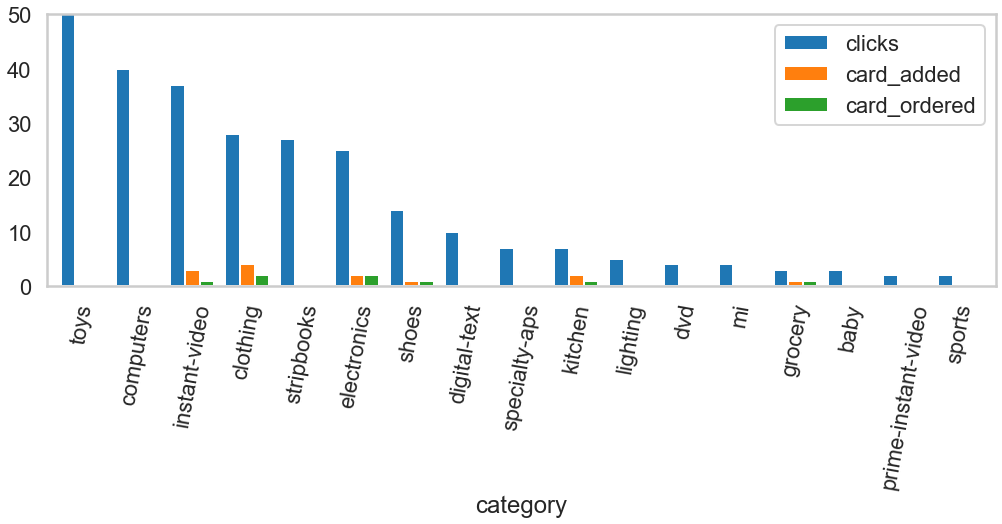

In [291]:
ax = clicks.plot('category',['clicks','card_added','card_ordered'],\
                   grid=False, kind='bar',ylim =[0,50], width=0.8, figsize=(17,5))
ax.set_xticklabels(clicks['category'], rotation=80)

In [292]:
spearmancorr = clicks.corr(method ='spearman') #non-parametric since no normal distribution 
spearmancorr

,clicks,card_added,card_ordered
clicks,1.000000,0.326855,0.287283
card_added,0.326855,1.000000,0.977128
card_ordered,0.287283,0.977128,1.000000


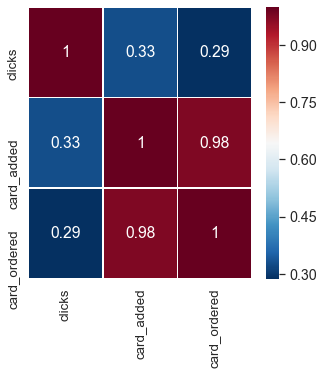

In [303]:
fig, ax = plt.subplots(figsize=(5,5))  
sns.set(font_scale=1.3)

sns.heatmap(spearmancorr, 
            xticklabels=spearmancorr.columns,
            yticklabels=spearmancorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5
           )